In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
#%matplotlib widget
%matplotlib inline

In [3]:
# Load the data
df = pd.read_excel('Vigitel-2019-peso-rake.xls', sheet_name='Sheet1')


In [6]:
df_input = pd.DataFrame()
df_input["peso"] = df.loc[(df.q9 > 0) & (df.q9 < 150), "q9"].reset_index(drop=True)
df_input["altura"] = df.loc[(df.q11 > 0) & (df.q11 < 250), "q11"].reset_index(drop=True)
df_input["atividades_minutos"] = df["r148_mm"]
df_input["diabetes"] = (df["q76"] == 1).astype(int)  # convert boolean to integer
df_input["idade"] = df.loc[(df.q6 > 0) & (df.q6 < 120), "q6"].reset_index(drop=True)
df_input = df_input.dropna().reset_index(drop=True)
print(df_input.shape)
df_input.to_csv("output_cluster.csv")

(5511, 5)


In [7]:
df_input

,peso,altura,atividades_minutos,diabetes,idade
0,74,168.0,0.0,0,88
1,62,180.0,0.0,1,68
2,90,170.0,0.0,0,22
3,67,170.0,0.0,0,61
4,75,130.0,0.0,0,51
...,...,...,...,...,...
5506,80,163.0,0.0,0,53
5507,60,159.0,0.0,0,55
5508,70,158.0,0.0,0,55
5509,65,165.0,0.0,1,60


In [6]:
# Select the features to be used in the clustering
features = ['peso', 'altura', 'diabetes']

In [7]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_input[features])

In [8]:
# Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

In [9]:
len(X)

5511

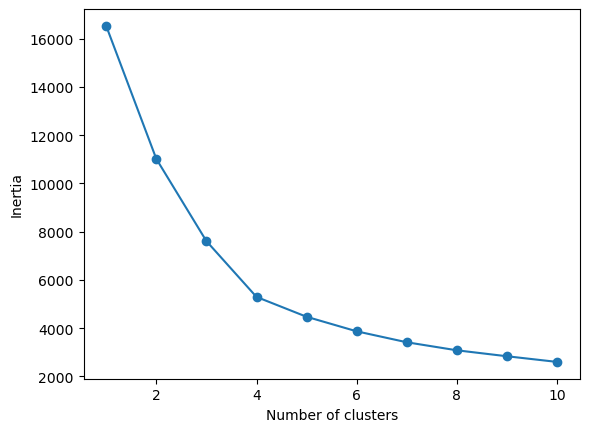

In [10]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [11]:
# Based on the elbow method, let's use 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [12]:
len(kmeans.labels_)

5511

In [13]:
# Add the cluster labels to the dataframe
df_input['cluster'] = kmeans.labels_

In [14]:
# Print the size of each cluster
print(df_input['cluster'].value_counts())

0    2121
2    1772
1    1248
3     370
Name: cluster, dtype: int64


<AxesSubplot: xlabel='altura', ylabel='peso'>

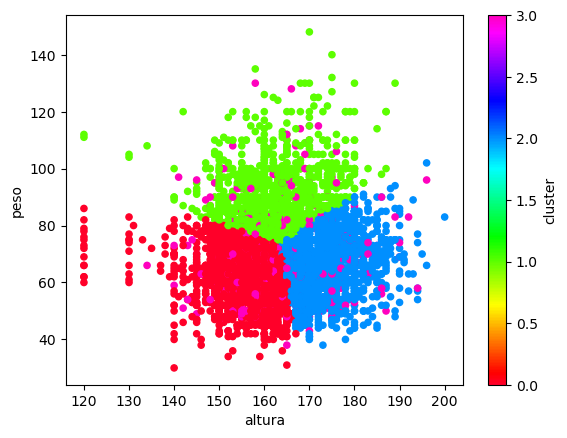

In [15]:
df_input.plot.scatter('altura','peso', c='cluster', colormap='gist_rainbow')

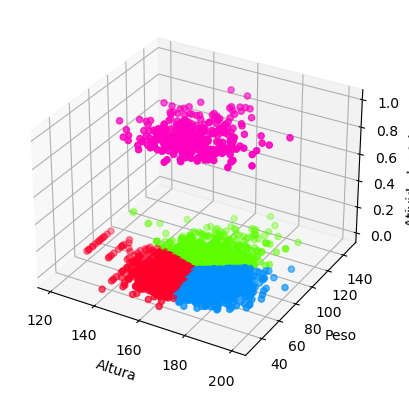

In [16]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_input['altura'], df_input['peso'], df_input['diabetes'], c=df_input['cluster'], cmap='gist_rainbow')
ax.set_xlabel('Altura')
ax.set_ylabel('Peso')
ax.set_zlabel('Atividades Minutos')
plt.show()

In [17]:
len(df_input.diabetes == 2)

5511

In [18]:
[df_input.diabetes == 1]

[0       False
 1        True
 2       False
 3       False
 4       False
         ...  
 5506    False
 5507    False
 5508    False
 5509     True
 5510    False
 Name: diabetes, Length: 5511, dtype: bool]